**Table of contents**<a id='toc0_'></a>    
- [Import statements](#toc1_1_)    
- [**Scales**](#toc2_)    
- [**Ticks**](#toc3_)    
- [Plot Customization: General Functions](#toc4_)    
  - [*Set multiple properties of an Axes at once with the `ax.set()` method* (Docs)](#toc4_1_)    
  - [*Set multiple properties on an Artist at once or list allowed values (to be set) with the `plt.setp(artists, *args, **kwargs)` method* (Docs)](#toc4_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=5
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_'></a>[Import statements](#toc0_)

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from numpy.random import default_rng

rng = default_rng()

In [3]:
std_normal_data = rng.standard_normal((100))

# Plot customization: Axis Scales and Ticks

Each Axes has two (or three) Axis objects representing the x- and y-axis. These control the scale of the Axis, the tick locators and the tick formatters.

## <a id='toc2_'></a>[**Scales**](#toc0_)

In addition to the linear scale, Matplotlib supplies non-linear scales, such as a log-scale. Since log-scales are used so much there are also direct methods like loglog, semilogx, and semilogy.

To set the scale manually we use the `ax.set_xscale()` and, `ax.set_yscale()` methods.

In [4]:
xdata = np.arange(len(std_normal_data))
data = 10**std_normal_data

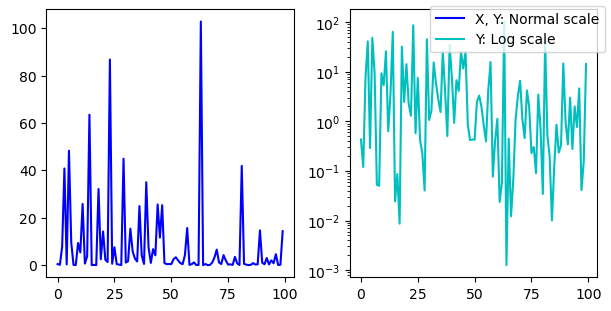

In [5]:
fig, [ax00, ax01] = plt.subplots(1, 2, figsize=(6, 3), layout="constrained")

line1 = ax00.plot(xdata, data, color="b")
line2 = ax01.plot(xdata, data, color="c")

ax01.set_yscale("log")

fig.legend(["X, Y: Normal scale", "Y: Log scale"])

plt.show()

## <a id='toc3_'></a>[**Ticks**](#toc0_)

Each Axis has a tick locator and formatter that choose where along the Axis objects to put tick marks. A simple interface to this are the `ax.set_xticks()` and `ax.set_yticks()` methods. We can also obtain the tick labels objects using the `ax.get_xticklabels()` and `ax.get_yticklabels()` methods in case we need them (maybe for formatting).

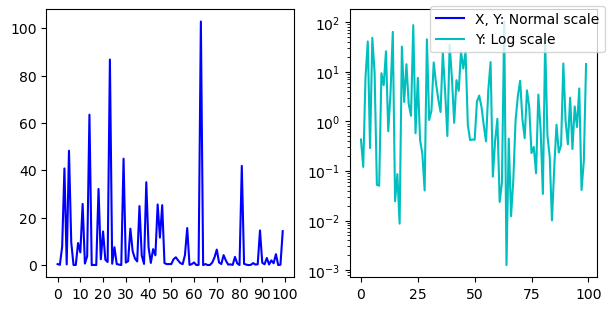

In [6]:
plt.sca(ax00)

ax00.set_xticks(ticks=np.arange(0, 110, 10), labels=np.arange(0, 110, 10))

plt.show()

**`Note:`** In case of Dates you may need to use some predefined formatter or custom formatter to accurately display the tick labels. See the documentation @https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html.

#### *Format axis tick labels with custom functions*

For labels, we can specify custom formatting guidelines in the form of functions. When used with `Axis.set_major_formatter(func)` or `Axis.set_minor_formatter(func)`, they will automatically create and use a *ticker.FuncFormatter* class.

In [7]:
def xtick_formatter(tick_label, tick_pos):
    return str(tick_label) + " Hz"

For this function, the tick_label argument is the original tick label and tick_pos is the tick position. We only used tick_label here but both arguments are needed.

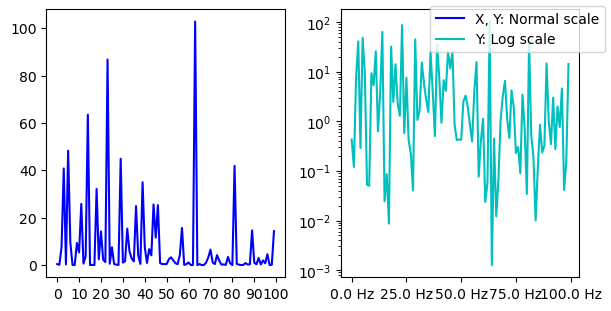

In [8]:
plt.sca(ax01)

# set the major formatter to the custom function
ax01.xaxis.set_major_formatter(xtick_formatter)

plt.show()

## <a id='toc4_'></a>[Plot Customization: General Functions](#toc0_)

### <a id='toc4_1_'></a>*Set multiple properties of an Axes at once with the `ax.set()` method* ([Docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set.html)) [&#8593;](#toc0_)

In [9]:
help(ax00.set)

Help on method set in module matplotlib.artist:

set(*, adjustable=<UNSET>, agg_filter=<UNSET>, alpha=<UNSET>, anchor=<UNSET>, animated=<UNSET>, aspect=<UNSET>, autoscale_on=<UNSET>, autoscalex_on=<UNSET>, autoscaley_on=<UNSET>, axes_locator=<UNSET>, axisbelow=<UNSET>, box_aspect=<UNSET>, clip_box=<UNSET>, clip_on=<UNSET>, clip_path=<UNSET>, facecolor=<UNSET>, frame_on=<UNSET>, gid=<UNSET>, in_layout=<UNSET>, label=<UNSET>, mouseover=<UNSET>, navigate=<UNSET>, path_effects=<UNSET>, picker=<UNSET>, position=<UNSET>, prop_cycle=<UNSET>, rasterization_zorder=<UNSET>, rasterized=<UNSET>, sketch_params=<UNSET>, snap=<UNSET>, subplotspec=<UNSET>, title=<UNSET>, transform=<UNSET>, url=<UNSET>, visible=<UNSET>, xbound=<UNSET>, xlabel=<UNSET>, xlim=<UNSET>, xmargin=<UNSET>, xscale=<UNSET>, xticklabels=<UNSET>, xticks=<UNSET>, ybound=<UNSET>, ylabel=<UNSET>, ylim=<UNSET>, ymargin=<UNSET>, yscale=<UNSET>, yticklabels=<UNSET>, yticks=<UNSET>, zorder=<UNSET>) method of matplotlib.axes._axes.Axes in

### <a id='toc4_2_'></a>*Set multiple properties on an Artist at once or list allowed values (to be set) with the `plt.setp(artists, *args, **kwargs)` method* ([Docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.setp.html)) [&#8593;](#toc0_)

In [10]:
help(plt.setp)

Help on function setp in module matplotlib.pyplot:

setp(obj, *args, **kwargs)
    Set one or more properties on an `.Artist`, or list allowed values.
    
    Parameters
    ----------
    obj : `~matplotlib.artist.Artist` or list of `.Artist`
        The artist(s) whose properties are being set or queried.  When setting
        properties, all artists are affected; when querying the allowed values,
        only the first instance in the sequence is queried.
    
        For example, two lines can be made thicker and red with a single call:
    
        >>> x = arange(0, 1, 0.01)
        >>> lines = plot(x, sin(2*pi*x), x, sin(4*pi*x))
        >>> setp(lines, linewidth=2, color='r')
    
    file : file-like, default: `sys.stdout`
        Where `setp` writes its output when asked to list allowed values.
    
        >>> with open('output.log') as file:
        ...     setp(line, file=file)
    
        The default, ``None``, means `sys.stdout`.
    
    *args, **kwargs
        The pro

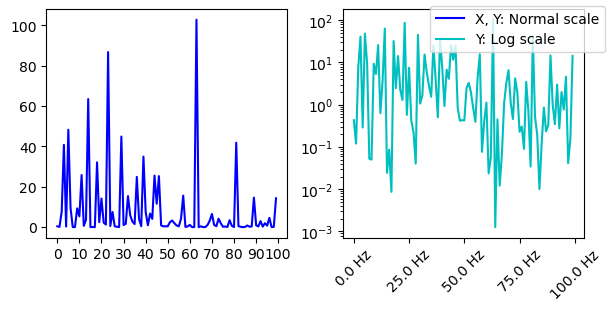

In [11]:
plt.sca(ax01)

xtick_labels = ax01.get_xticklabels()

plt.setp(xtick_labels, rotation=45, horizontalalignment="center")

plt.show()